<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/survey2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [12]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 8.8MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [20]:
data= pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2019/multiple_choice_responses.csv')

In [21]:
data_other = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2019/other_text_responses.csv')

In [8]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


In [22]:
data = data.T.reset_index(drop=True).set_index(0).T

In [23]:
data_other = data_other.T.reset_index(drop=True).set_index(0).T

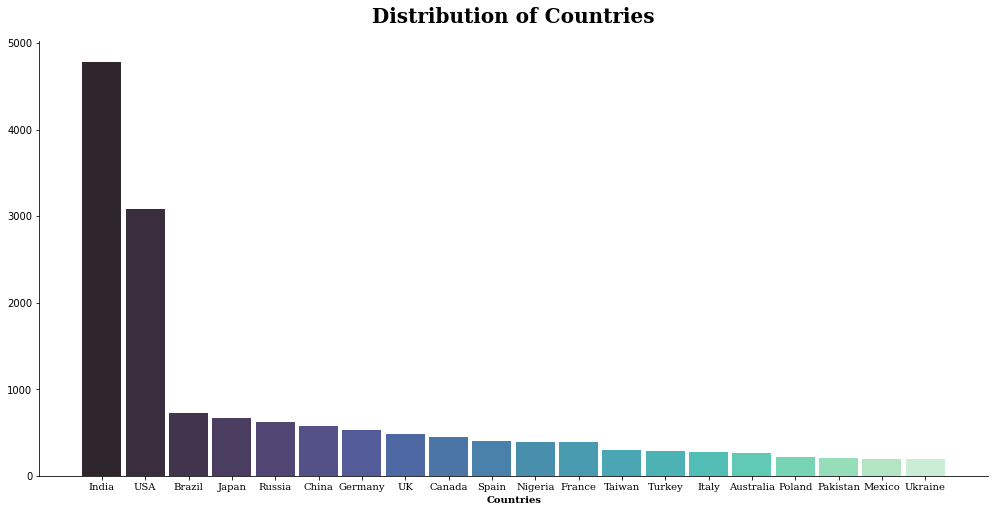

In [63]:
data_country20 = data['In which country do you currently reside?'].value_counts().drop('Other')[:20]
data_country20 = data_country20.rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'})
fig, ax = plt.subplots(figsize=(17,8))
ax.bar(data_country20.index, data_country20, color=sns.color_palette('mako', n_colors=len(data_country20.index)), alpha=.9, linewidth=.8, width=.9)
ax.set_xticklabels(data_country20.index, fontsize=10, fontfamily='serif')
ax.set_xlabel('Countries', fontfamily='serif', fontweight='bold')
ax.set_title('Distribution of Countries', fontsize=20, fontweight='bold', fontfamily='serif', pad=18)

for i in ['top','right']:
  ax.spines[i].set_visible(False)

In [101]:
data['In which country do you currently reside?'].replace(['United States of America', 'United Kingdom of Great Britain and Northern Ireland'], ['USA', 'UK'], inplace=True)

In [147]:
country10 = data['In which country do you currently reside?'].value_counts()[:10].index
data_ca = data.groupby('In which country do you currently reside?')['What is your age (# years)?'].value_counts().loc[country10].reset_index(name='Counts')
fig = px.bar(data_frame=data_ca, x='In which country do you currently reside?', color='What is your age (# years)?', y='Counts', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Age distribution by country (Bar ver)',
                  title_font_size=25,
                  title_font_family='sans-Ariel')



---


# 위 나라와 나이 시각화로 얻은 결론


---


1. 인도의 데이터 사이언스를 공부 하는사람들이 많다.(중국보다 훨...) ==> 이유가 뭘까??

2. 인도의 데이터 사이언스 나이 분포는 10대도 많다.

3. 대부분의 나라에서 데이터 사이언스 분포는 20대-30대 후반까지의 비율이 높다.




In [149]:
data['What is your gender? - Selected Choice'].replace(['Prefer not to say', 'Prefer to self-describe'], 'ETC', inplace=True)

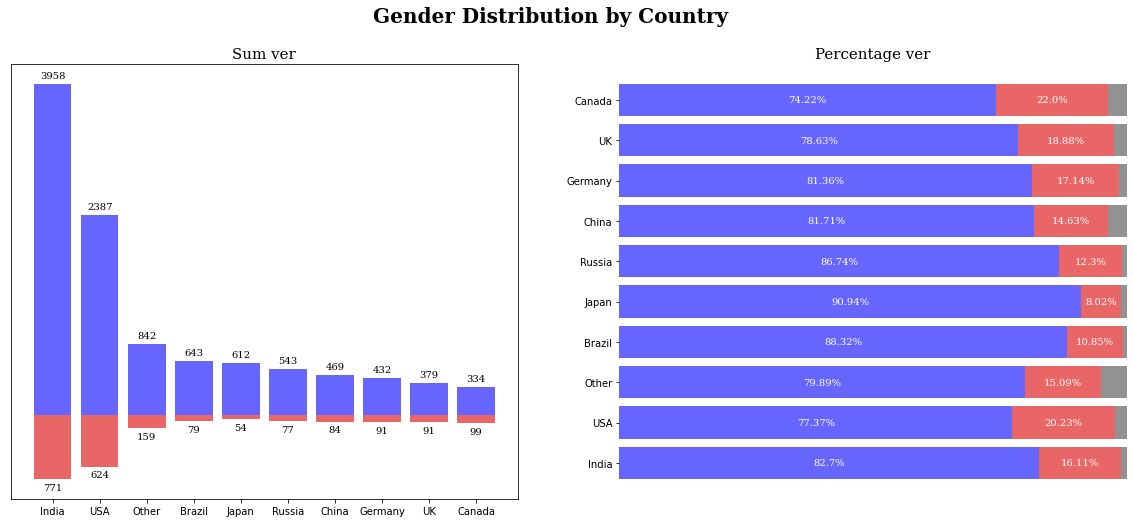

In [209]:
data_cg = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts().loc[country10].unstack()
fig, ax = plt.subplots(figsize=(20,8), ncols=2, nrows=1)
ax[0].bar(data_cg.index, data_cg['Male'], color='blue', alpha=.6)
ax[0].bar(data_cg.index, -data_cg['Female'], color='#DB0000', alpha=.6)
ax[0].set_yticks([])
ax[0].set_title('Sum ver', fontsize=15, fontfamily='serif')
fig.suptitle('Gender Distribution by Country', fontsize=20, fontfamily='serif', fontweight='bold')

for i in data_cg.index:
  ax[0].annotate(data_cg['Male'].loc[i], xy=(i, data_cg['Male'].loc[i] + 100), ha='center', va='center', fontweight='light', fontfamily='serif')

for i in data_cg.index:
  ax[0].annotate(data_cg['Female'].loc[i], xy=(i, -data_cg['Female'].loc[i] - 100), ha='center', va='center', fontweight='light', fontfamily='serif')

data_cg_normalize = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts(normalize=True).loc[country10].unstack()
ax[1].barh(data_cg_normalize.index, data_cg_normalize['Male'], color='blue', alpha=.6)
ax[1].barh(data_cg_normalize.index, data_cg_normalize['Female'], left=data_cg_normalize['Male'], color='#DB0000', alpha=.6)
ax[1].barh(data_cg_normalize.index, data_cg_normalize['ETC'], left=data_cg_normalize['Male'] + data_cg_normalize['Female'], color='#4a4a4a', alpha=.6)
ax[1].set_xticks([])
ax[1].set_xlim(0,1)
ax[1].set_title('Percentage ver', fontsize=15, fontfamily='serif')

for i in ['top', 'bottom', 'left', 'right']:
  ax[1].spines[i].set_visible(False)

for i in data_cg_normalize.index:
  ax[1].annotate(f"{round(data_cg_normalize['Male'].loc[i]*100, 2)}%", xy=(data_cg_normalize['Male'].loc[i]/2, i), va='center', ha='center', color='w', fontweight='light', fontfamily='serif')

for i in data_cg_normalize.index:
  ax[1].annotate(f"{round(data_cg_normalize['Female'].loc[i]*100, 2)}%", xy=(data_cg_normalize['Male'].loc[i] + data_cg_normalize['Female'].loc[i]/2, i), va='center', ha='center', color='w', fontweight='light', fontfamily='serif')

In [64]:
data

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers),Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Hacker News (https://news.ycombinator.com/),"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, r/datascience, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Cloud AI Adventures, Siraj Raval, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Who/what are your favorite media sources that report on data science topics? (Select 